## EAS 503 Homework 3 Submission
Name - Freya Genesis D Mello

**Make sure that you rename the notebook file to *replacewithubitname*_eas503_hw3.ipynb**


### Submission Details 
* **Due Date** - November 13, 2018 by 11:59 PM EST. All assignments have to be submitted using UBLearns.
* **Number of Problems** - 3 
* **Maximum points** - 100
* **Collaboration policy**
 - Every student has to submit individual homeworks
 - Any collaboration, in the form of discussion, with other members of the class is permitted, as long as the names of the collaborating members are explicitly stated on top of the submitted homework.
 - Any overlap with another submission or material from Internet will be awarded an F.
* **Late submission policy** - _No late submissions allowed_
* **Submission Format** - Enter code for each problem in the appropriate cell below. You may use multiple cells for a single problem to improve readability.

### Problem 1 - Using regular expressions in `Python` (50 points)

In this problem you will write a rudimentary web crawler to extract information from `Wikipedia`.

The three requirements for this problem are:
##### 1. Get a chronological list of US Presidents from the [List of Presidents of the United States](https://en.wikipedia.org/wiki/List_of_Presidents_of_the_United_States) wikipedia entry (20 points). 

You will have to write a function called `getPresidents(url)` which takes one argument, a string containing the url, and returns the list of URLs for the wikipedia pages for each US President in the chronological order of their presidency, i.e., `['https://en.wikipedia.org/wiki/George_Washington', 'https://en.wikipedia.org/wiki/John_Adams'] ...`

The url argument to the function should be - https://en.wikipedia.org/wiki/List_of_Presidents_of_the_United_States

You will notice that one president, Grover Cleveland, will appear twice. For his case, remove the second entry. Reason he comes twice will be apparent once you visit his entry on `Wikipedia`. While there you will also notice that he was the Mayor of Buffalo once, which is why we have the Grover Cleveland Highway in South Campus.

To write this function you will need to use the module `requests` which allows grabbing the html from any url. For instance:
```python
import requests
import re

url = "https://www.cse.buffalo.edu"
urlreq = request.get(url)
urltext = urlreq.txt
urllines = re.split(r'\n',urltext)
```

In the above snippet, urllines will be a `list` containing lines of the html code in the above website.

You will then write a parser that will go through the html lines and extract the list of presidents. You can check the actual page to see where that list is. 

**Note:** No points will be awarded to this problem if you have manually created the list or derived the list from an alternative url.

##### 2. Parse each President entry in `Wikipedia` and extract his date of birth. (20 points)
On each President's wikipedia entry, the `infobox` on the right lists, among other things, his exact birthday. Implement a function, called `getBirthdays(urls)` which takes as input the list that is returned by the above implemented `getPresidents(url)` function and returns a `Pandas` `TimeSeries` object, that simply contains the names of the Presidents as the value, and the birthdate as the time index.

##### 3. Plot an annotated `timeline` plot using `matplotlib`. (10 points)
Use `matplotlib` routines to plot **time line** of the US presidents, where the x-axis corresponds to time from 1720 until 2000 and y-axis denotes the birthdate for each president. The timeline plot should look similar to:

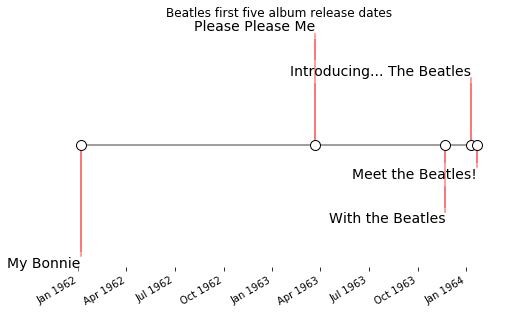

You will need to adjust the heights, font sizes, etc., to make it look clean.

Note that there is not direct function for plotting a module, you will just need to iterate over the values to create several overlaid plots with desired effects.

#### Points breakup:
This problem is worth 50 points, and first two subparts are worth 20 points each. For the plotting subpart, a clean looking plot with all information will fetch you 10 points. A cluttered plot, with all information, will only fetch you 5 points.

In [1]:
#Function to extract the links of pages of different presidents
def getPresidents(url):
    # Locating the presidents table in the webpage
    big_ind = re.findall(r'<big><a href.*', urltext)
    links = []
    for i in range(1, len(big_ind)):
        link = str(re.search(r'/wiki/(.*?)"', big_ind[i]).group())
        links.append(link)
        
        #Get the unique list of president links
        unique_Presidents = []
        for x in links:
            if x not in unique_Presidents:
                unique_Presidents.append(x)
    #Return list of Presidents
    return unique_Presidents

In [2]:
#Function to return a time series object which consists of datetime index having president birthdays with their names as values
def getBirthdays(urls):
    
    names = []
    bday_dates = []
    
    for url in urls:
        
        complete_url = "https://en.wikipedia.org/" + url
        urlreq = requests.get(complete_url)
        urltext = urlreq.text
        
        #Getting names
        name = str(re.sub('/wiki/.*?', '', url)).replace("_", " ")
        names.append(name)
        
        # Getting birthdays
        bday = str(re.search(r'bday">(.+?)<', urltext).group(1))
        bday_dates.append(bday)
        
        #Creating Dataframe
        Timeline = pd.DataFrame(np.column_stack([names]), index = bday_dates)
        
        
    #Timeseries object   
    return(Timeline)
    
    

In [3]:
#Import packages required
import requests
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import matplotlib.dates as mdates
import time



url = "https://en.wikipedia.org/wiki/List_of_Presidents_of_the_United_States"
urlreq = requests.get(url)
urltext = urlreq.text
urllines = re.split(r'\n',urltext)

urls = getPresidents(url)

urls_final = [x[:-1] for x in urls]
#Getting the dataframe
Timeline = getBirthdays(urls_final)



In [4]:
start_date = "1720-01-01 00:00:00"
end_date = "2000-01-01 00:00:00"
start_date = pd.to_datetime(start_date)
end_date = pd.to_datetime(end_date)


In [5]:
Timeline.index = pd.to_datetime(Timeline.index)

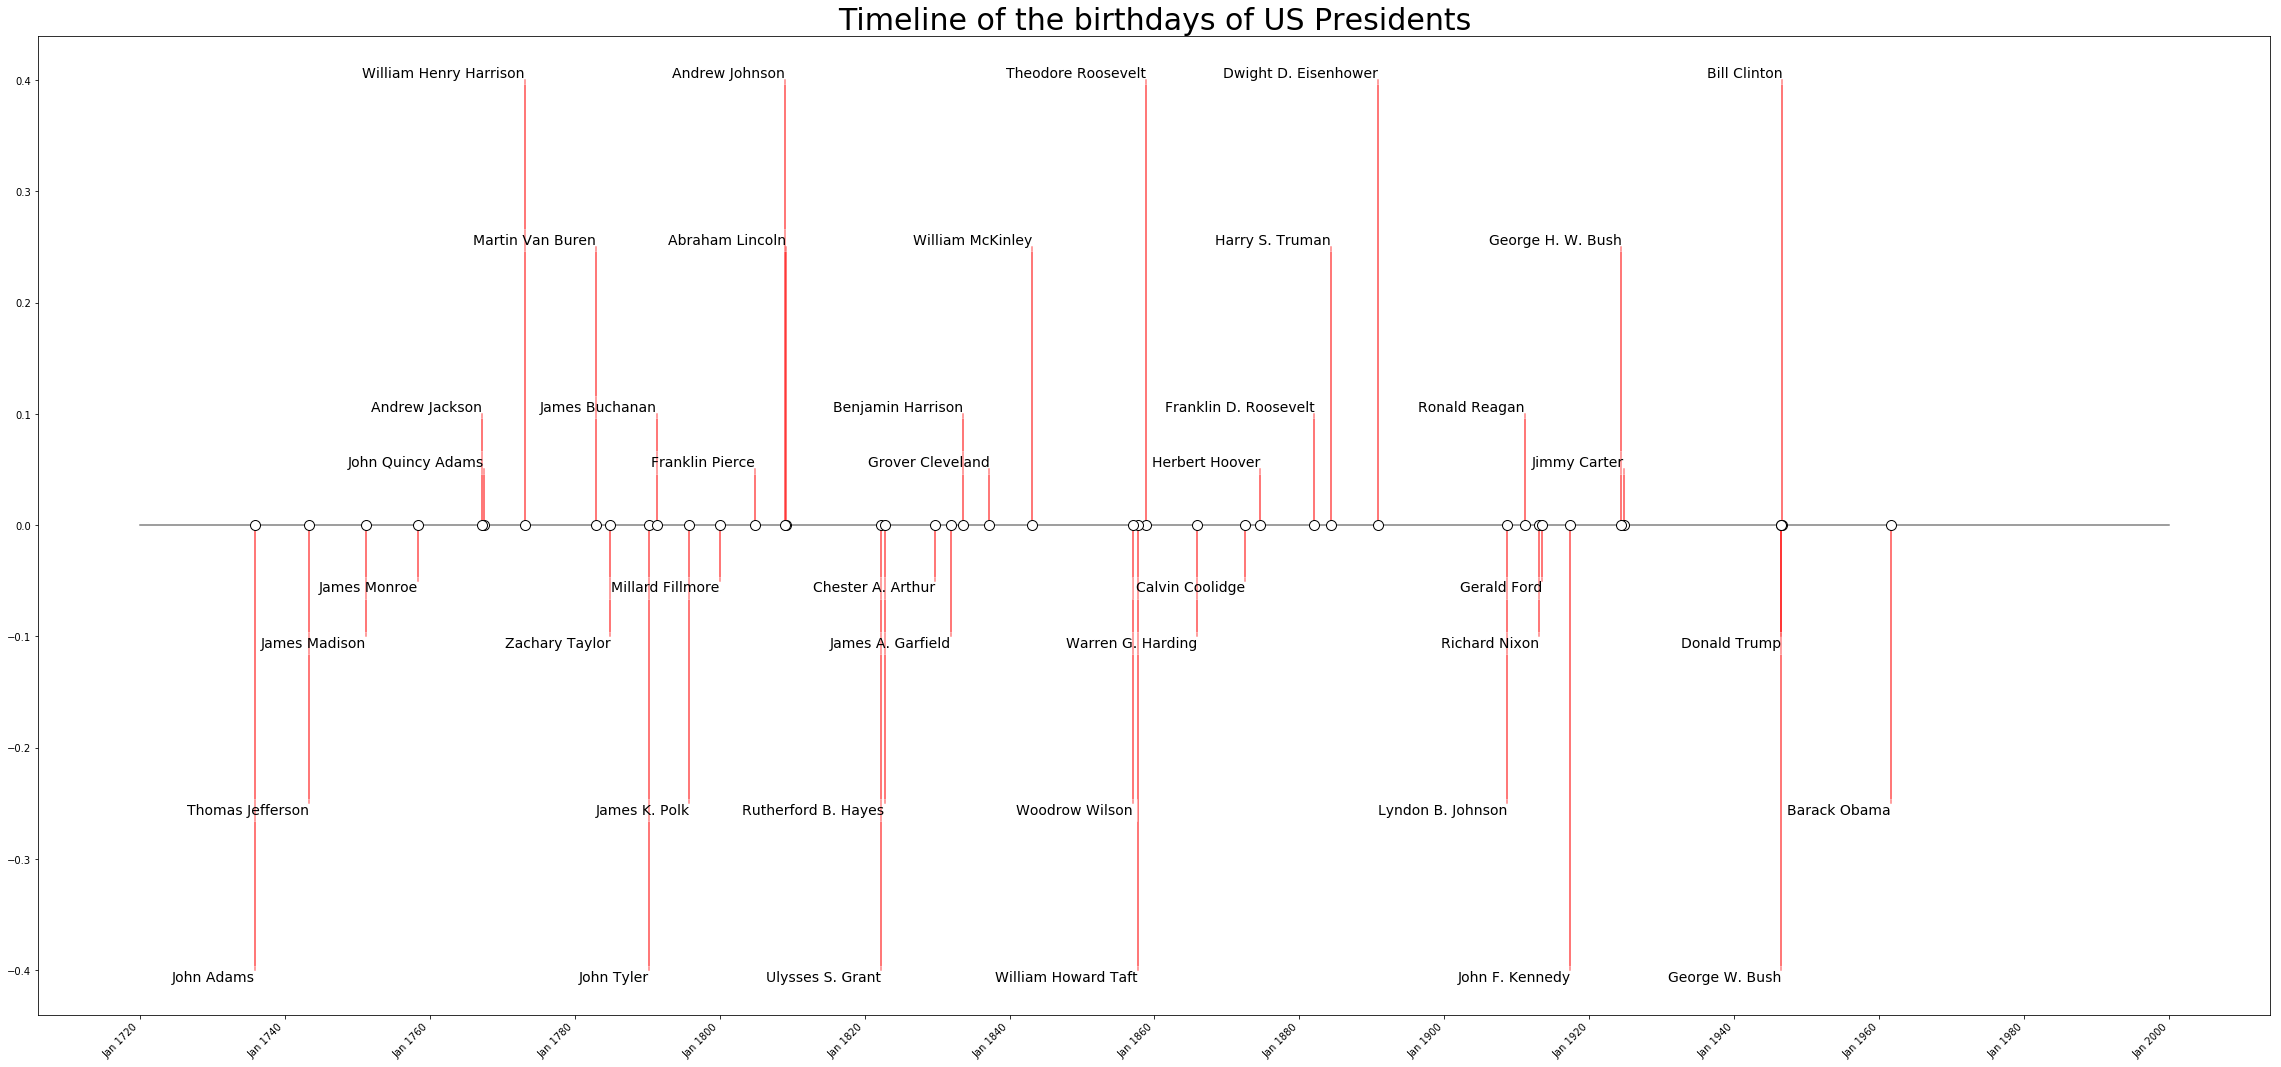

In [6]:
#Timelines of presidents and their birthdays
fig, ax = plt.subplots(figsize=(40, 20))

ii = 0
#Creating multiple levels to put the text above and below the timeline
levels = np.array([-0.40, -0.25, -0.10, -0.05, 0.05, 0.10, 0.25, 0.40])

for (index, row) in Timeline.iterrows():
    
    level = levels[ii%8]
    
    vert = 'top' if (level) < 0 else 'bottom'
    #Plotting each president as a scatter plot
    ax.scatter(index, 0, s=100, facecolor='w', edgecolor='k', zorder=9999)
    
    ax.plot((index, index), (0, level), c='r', alpha=.7)
    #Adding text to the plot at the desired locations
    ax.text(index, level, row[0],
          horizontalalignment='right', verticalalignment=vert, fontsize=14,
            backgroundcolor=(1., 1., 1., .3))
    
    ii = ii + 1

ax.set_title('Timeline of the birthdays of US Presidents',fontsize= 30)     
ax.get_xaxis().set_major_locator(mdates.YearLocator(base=20, day=1, tz=None))
ax.get_xaxis().set_major_formatter(mdates.DateFormatter("%b %Y"))
fig.autofmt_xdate()

fig.autofmt_xdate()
ax.plot((start_date, end_date), (0, 0), 'k', alpha=.5)
plt.xticks(rotation=45)
plt.show()



### Problem 2 - Chicago Crime Data (25 points)

The Chicago Crime Data reflects the crime incidents that occured in the city of Chicago during 2016 and 2017. The data is provided in the `chicago_crime_data_v3.csv` file. For each crime incident, there is information regarding the case ID, crime location, description, primary crime type ID, coordinates of the crime etc. To identify the primary crime type (denoted by the `Primary type` variable), the `primary_type_ID.csv` file is provided which maps the primary crime type to their corresponding ID.

For this problem, the goal is to identify the crime types that have occurred more than 10,000 times during the years 2016 and 2017. For this,

1. Import the CSV files as dataframes using pandas.

2. Sort the crime data file by crime ID and merge the two files by `Primary Type ID` variable. 

3. Identify the crime types that have a frequency >10,000 and list them as `High Frequency Crime Types`. Provide a timeseries plot for all `High Frequency Crime Types`. For this, compute the number of crimes that occur per each crime type per month (2016 Jan - 2017 Dec). Use the `series.plot` method in Pandas for Series objects. 

4. Using the code provided below, plot all the crimes that come under `High Frequency Crime Types` on a map of Chicago. For this, use the location information provided in the data. For any crimes with missing location coordinates, sort the data by ascending `Date` and use forward fill.  

(Make sure that each data point must be plotted as a transparent circular dots with a markersize of atleast 20 and alpha set to atmost 0.5 (transparency))

_Installation Notes_: You will need the `basemap` package. You can get that using:
```script
conda install basemap
```

Due to some bug in the way `conda` maintains environmental variables, the following import statement might not work:
```python
from mpl_toolkits.basemap import Basemap
```

If it does not work on your computer, try the following:
```python
import os,conda

conda_file_dir = conda.__file__
conda_dir = conda_file_dir.split('lib')[0]
proj_lib = os.path.join(os.path.join(conda_dir, 'share'), 'proj')
os.environ["PROJ_LIB"] = proj_lib

from mpl_toolkits.basemap import Basemap
```

In [7]:
#Importing requred packages
import pandas as pd
import matplotlib as plt
%matplotlib inline

#Load the crime data and primary id data into python environment
crime_data = pd.read_csv('./chicago_crime_data_v3.csv')
primary_id = pd.read_csv('./primary_type_id.csv')

#Sorting the crimedata
crime_data = crime_data.set_index('Cime_ID')
crime_data.sort_index(inplace=True)

primary_id = primary_id.set_index('Primary Type ID')
primary_id.sort_index(inplace=True)



In [8]:
final_data = pd.merge(crime_data, primary_id, on = 'Primary Type ID')

In [9]:
final_data['Year'] = pd.DatetimeIndex(final_data['Date']).year
final_data['Month'] = pd.DatetimeIndex(final_data['Date']).month

In [10]:
final_data_1 = final_data.groupby(['Primary Type'], as_index=False).size().reset_index(name='counts')

In [11]:
final_data_2 = final_data_1[final_data_1['counts']>10000]

In [12]:
final_data_2

,Primary Type,counts
1,ASSAULT,31143
2,BATTERY,81995
3,BURGLARY,22524
6,CRIMINAL DAMAGE,49746
7,CRIMINAL TRESPASS,10747
8,DECEPTIVE PRACTICE,28994
16,MOTOR VEHICLE THEFT,18505
17,NARCOTICS,20184
24,OTHER OFFENSE,28597
28,ROBBERY,19076


In [13]:
fin = pd.merge(final_data, final_data_2, on = 'Primary Type')

In [14]:
High_Frequency_Crime_Types = fin.groupby(['Primary Type', 'Month', 'Year'], 
                                                as_index=False).size().reset_index(name='counts')

In [15]:
final_data = final_data.sort_values(by=['Year', 'Month'])
final = final_data.merge(High_Frequency_Crime_Types, on = ['Primary Type', 'Month', 'Year'])

In [16]:
final['Fin_Date'] = final['Month'].map(str) + "/"+ final['Year'].map(str)

In [17]:
final.set_index('Fin_Date')

,Case Number,Date,Block,Primary Type ID,Description,Location Description,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,Primary Type,Month,counts
Fin_Date,,,,,,,,,,,,,,,,
1/2016,HZ100012,1/1/2016 0:01,014XX S AVERS AVE,7,TO PROPERTY,APARTMENT,1150945.0,1892794.0,2016,1/10/2016 8:46,41.861718,-87.721386,"(41.861717546, -87.721386272)",CRIMINAL DAMAGE,1,2373
1/2016,HZ100011,1/1/2016 0:20,021XX N CALIFORNIA AVE,7,TO VEHICLE,PARKING LOT/GARAGE(NON.RESID.),1157345.0,1914452.0,2016,1/10/2016 8:46,41.921021,-87.697304,"(41.921021491, -87.69730355)",CRIMINAL DAMAGE,1,2373
1/2016,HZ100055,1/1/2016 1:20,005XX N LOCKWOOD AVE,7,TO PROPERTY,APARTMENT,1140947.0,1902786.0,2016,1/10/2016 8:46,41.889327,-87.757842,"(41.889326577, -87.757841738)",CRIMINAL DAMAGE,1,2373
1/2016,HZ100021,1/1/2016 0:35,085XX W BRYN MAWR AVE,7,TO PROPERTY,HOTEL/MOTEL,1118477.0,1936072.0,2016,1/10/2016 8:46,41.981052,-87.839659,"(41.981051826, -87.839658835)",CRIMINAL DAMAGE,1,2373
1/2016,HZ100083,1/1/2016 1:37,072XX S SACRAMENTO AVE,7,TO PROPERTY,RESIDENCE,1157623.0,1856549.0,2016,1/10/2016 8:46,41.762123,-87.697856,"(41.762123352, -87.697856228)",CRIMINAL DAMAGE,1,2373
1/2016,HZ100051,1/1/2016 0:01,020XX W WASHINGTON BLVD,7,TO PROPERTY,RESIDENCE,1162793.0,1900685.0,2016,1/10/2016 8:46,41.883131,-87.677673,"(41.883131184, -87.677672969)",CRIMINAL DAMAGE,1,2373
1/2016,HZ100086,1/1/2016 1:47,015XX N WESTERN AVE,7,TO VEHICLE,STREET,1160132.0,1910073.0,2016,1/10/2016 8:46,41.908948,-87.687185,"(41.908948011, -87.687184685)",CRIMINAL DAMAGE,1,2373
1/2016,HZ100025,1/1/2016 0:05,072XX S RHODES AVE,7,TO PROPERTY,RESIDENCE,1181159.0,1857139.0,2016,1/10/2016 8:46,41.763233,-87.611576,"(41.763232864, -87.611576015)",CRIMINAL DAMAGE,1,2373
1/2016,HZ100113,1/1/2016 2:05,013XX S KARLOV AVE,7,TO PROPERTY,APARTMENT,1149263.0,1893553.0,2016,1/10/2016 8:46,41.863833,-87.727541,"(41.863833067, -87.727540998)",CRIMINAL DAMAGE,1,2373


In [18]:
#Takes alot of time
final['Fin_Date'] = pd.to_datetime(final['Fin_Date'], format='%m/%Y')

In [19]:
unstacked = final.groupby(['Fin_Date','Primary Type']).count().sort_index()['counts'].unstack()

In [20]:
list_of_crimes = ['ASSAULT', 'BATTERY', 'BURGLARY', 'CRIMINAL DAMAGE', 'CRIMINAL TRESPASS', 
                               'DECEPTIVE PRACTICE', 'MOTOR VEHICLE THEFT', 'NARCOTICS', 'OTHER OFFENSE', 
                                'ROBBERY', 'THEFT']

In [21]:
seri = pd.DataFrame(unstacked, index=unstacked.index, columns=list_of_crimes)

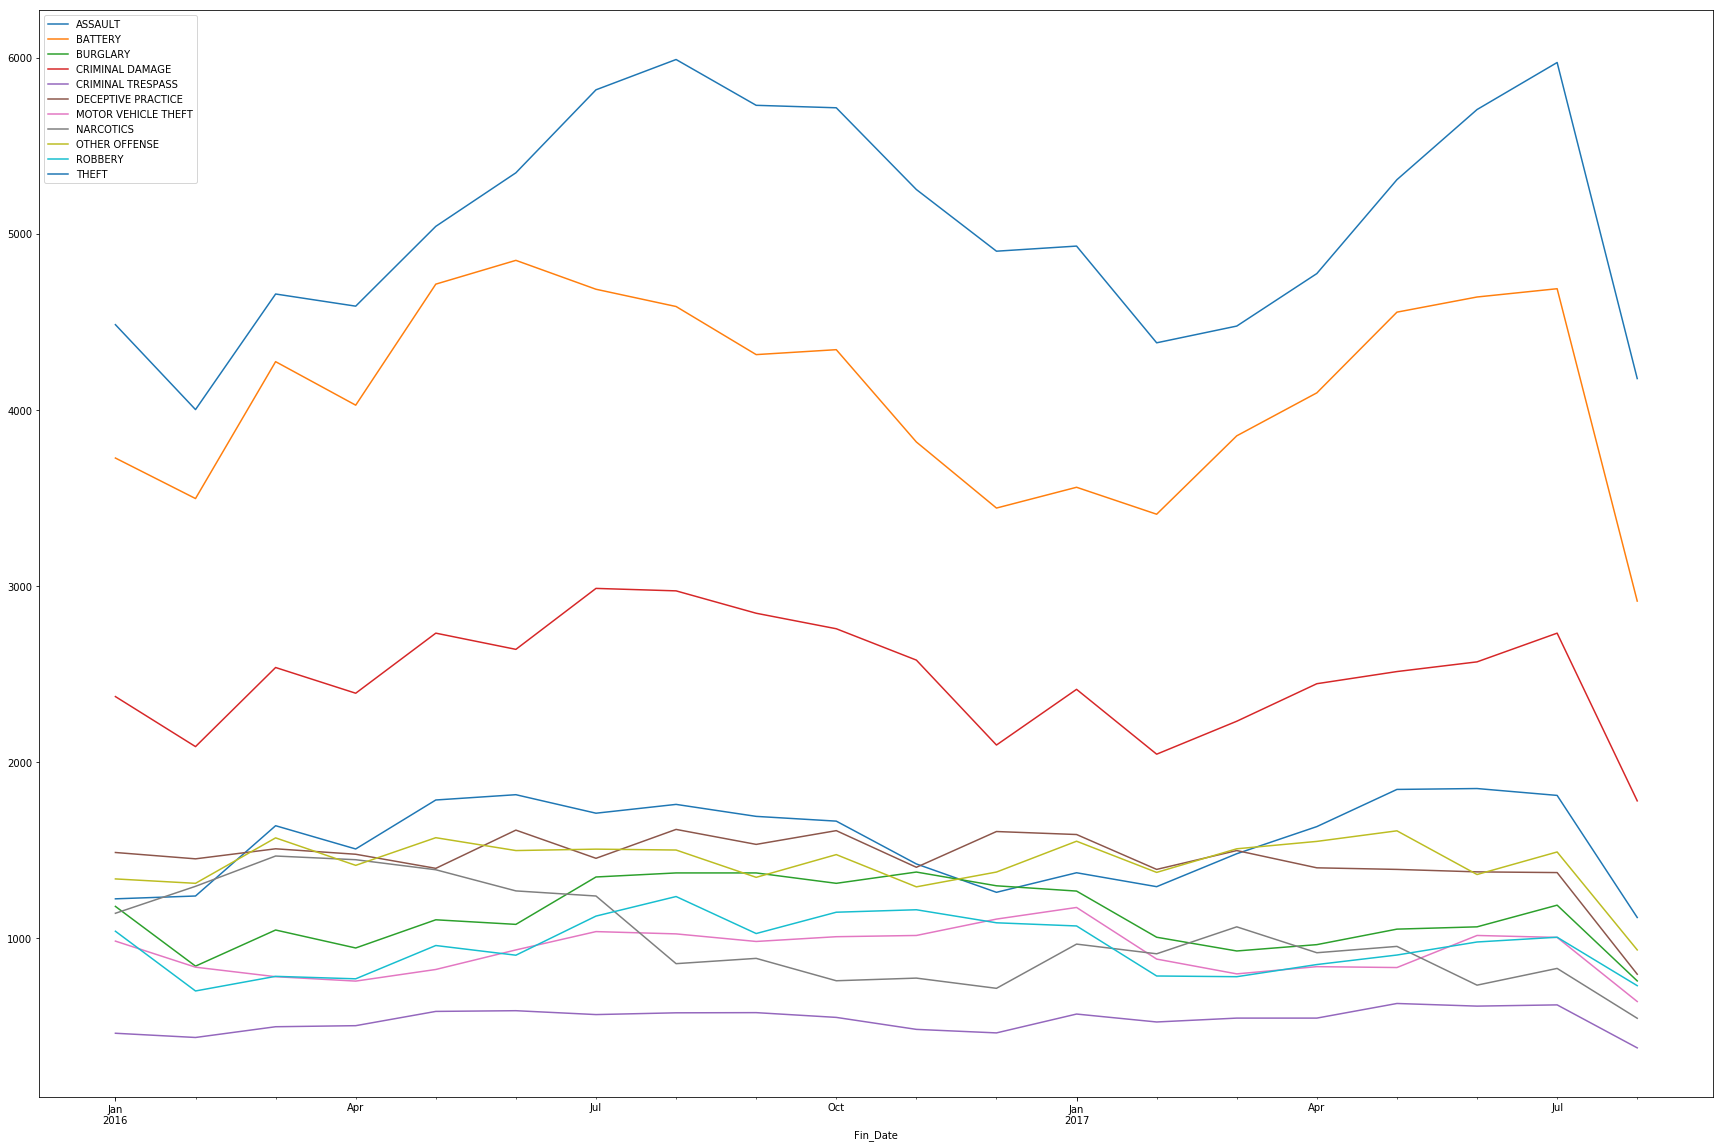

In [22]:
#Plotting the line plot for different crime types

import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = plt.subplots(figsize=(30, 20))

for i in list_of_crimes:
    seri[i].plot()
    plt.plot(label = seri[i])

plt.legend()

In [23]:
import os,conda

conda_file_dir = conda.__file__
conda_dir = conda_file_dir.split('lib')[0]
proj_lib = os.path.join(os.path.join(conda_dir, 'share'), 'proj')
os.environ["PROJ_LIB"] = proj_lib

from mpl_toolkits.basemap import Basemap

In [24]:
final

,Case Number,Date,Block,Primary Type ID,Description,Location Description,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,Primary Type,Month,counts,Fin_Date
0,HZ100012,1/1/2016 0:01,014XX S AVERS AVE,7,TO PROPERTY,APARTMENT,1150945.0,1892794.0,2016,1/10/2016 8:46,41.861718,-87.721386,"(41.861717546, -87.721386272)",CRIMINAL DAMAGE,1,2373,2016-01-01
1,HZ100011,1/1/2016 0:20,021XX N CALIFORNIA AVE,7,TO VEHICLE,PARKING LOT/GARAGE(NON.RESID.),1157345.0,1914452.0,2016,1/10/2016 8:46,41.921021,-87.697304,"(41.921021491, -87.69730355)",CRIMINAL DAMAGE,1,2373,2016-01-01
2,HZ100055,1/1/2016 1:20,005XX N LOCKWOOD AVE,7,TO PROPERTY,APARTMENT,1140947.0,1902786.0,2016,1/10/2016 8:46,41.889327,-87.757842,"(41.889326577, -87.757841738)",CRIMINAL DAMAGE,1,2373,2016-01-01
3,HZ100021,1/1/2016 0:35,085XX W BRYN MAWR AVE,7,TO PROPERTY,HOTEL/MOTEL,1118477.0,1936072.0,2016,1/10/2016 8:46,41.981052,-87.839659,"(41.981051826, -87.839658835)",CRIMINAL DAMAGE,1,2373,2016-01-01
4,HZ100083,1/1/2016 1:37,072XX S SACRAMENTO AVE,7,TO PROPERTY,RESIDENCE,1157623.0,1856549.0,2016,1/10/2016 8:46,41.762123,-87.697856,"(41.762123352, -87.697856228)",CRIMINAL DAMAGE,1,2373,2016-01-01
5,HZ100051,1/1/2016 0:01,020XX W WASHINGTON BLVD,7,TO PROPERTY,RESIDENCE,1162793.0,1900685.0,2016,1/10/2016 8:46,41.883131,-87.677673,"(41.883131184, -87.677672969)",CRIMINAL DAMAGE,1,2373,2016-01-01
6,HZ100086,1/1/2016 1:47,015XX N WESTERN AVE,7,TO VEHICLE,STREET,1160132.0,1910073.0,2016,1/10/2016 8:46,41.908948,-87.687185,"(41.908948011, -87.687184685)",CRIMINAL DAMAGE,1,2373,2016-01-01
7,HZ100025,1/1/2016 0:05,072XX S RHODES AVE,7,TO PROPERTY,RESIDENCE,1181159.0,1857139.0,2016,1/10/2016 8:46,41.763233,-87.611576,"(41.763232864, -87.611576015)",CRIMINAL DAMAGE,1,2373,2016-01-01
8,HZ100113,1/1/2016 2:05,013XX S KARLOV AVE,7,TO PROPERTY,APARTMENT,1149263.0,1893553.0,2016,1/10/2016 8:46,41.863833,-87.727541,"(41.863833067, -87.727540998)",CRIMINAL DAMAGE,1,2373,2016-01-01
9,HZ100152,1/1/2016 2:00,132XX S DR MARTIN LUTHER KING JR DR,7,TO PROPERTY,RESIDENCE,1181061.0,1817544.0,2016,1/10/2016 8:46,41.654581,-87.613149,"(41.654581281, -87.613148937)",CRIMINAL DAMAGE,1,2373,2016-01-01


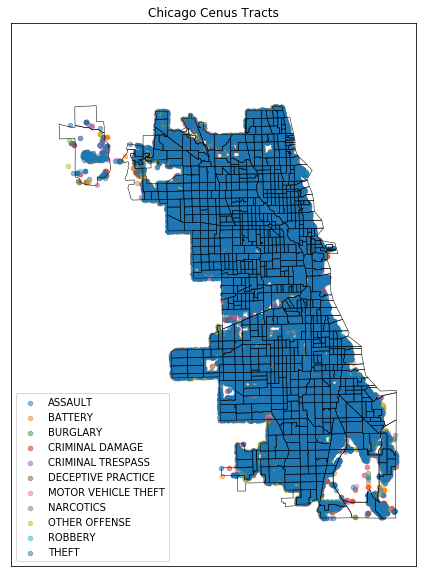

In [25]:
from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize=[16,10])
m = Basemap(projection='merc',llcrnrlat=41.60,urcrnrlat=42.10,\
        llcrnrlon=-88.0,urcrnrlon=-87.50,lat_ts=20,resolution='c')
m.readshapefile('./geo_export_0e3da441-8fe8-4e11-9ca0-42ef75cab68e','chicago')

final['Latitude'] = final['Latitude'].ffill()
final['Longitude'] = final['Longitude'].ffill()


for crime in list_of_crimes:
    longitudes = []
    latitudes = []
    crim_type = final.loc[final['Primary Type'] == crime]
    #Using the latitude and longitude of different locations to plot the heatmap
    for (l1, l2) in crim_type.iterrows():
        longitudes.append(l2['Longitude'])
        latitudes.append(l2['Latitude'])
    x,y = m(longitudes,latitudes)
    label_text = crime
    plt.scatter(x, y, alpha=0.5, s=20, label = label_text)
plt.title("Chicago Cenus Tracts")
plt.legend()
plt.show()

### Problem 3 - Benchmarking Problem (25 Points)

Numpy has in-built universal functions that allow operations on multidimentional arrays. For this problem, you will be asked to test the performance of some of this functions.

For this, create an `NxN` matrix `A` and an array `B` of size `N`, with random entries (use `numpy.random`). Using `A` and `B` as inputs, performing the following operations: (compare and time the performance of sorting algorithms with and without numpy ufunc)

1. Sorting `B` (you can use `numpy.sort`) for `N` ranging from 1000 to 25000 (take steps of 1000)
2. Computing Determinant of `A` ( you can use `numpy.linalg.det` to compute the determinant of the matrix) for `N` ranging from 100 to 800 (take steps of 50)
3. Matrix Multiplication of `A*A` ( use `numpy.matmul`) for `N` ranging from 100 to 1500 

Plot the operation times for Numpy functions vs regular python commands for each operation.

The final output must include 3 plots comparing the performance of universal functions in Numpy with similar analogs in python for each operation. Provide a breif interpretation from the plots. (Feel free to test around the range of `N` for this problem).

In [45]:
time_sort_np = []
B_sort_np_size = []

#Sorting using NUMPY
for n_b in range(1000, 25000, 1000):
    B = np.random.rand(n_b)
    start_time = time.time()
    B = np.sort(B)
    end_time = time.time()
    time_taken = end_time - start_time
    time_sort_np.append(time_taken)
    B_sort_np_size.append(n_b)
    

In [46]:
time_sort_reg = []
B_sort_reg_size = []

#Sorting using Inbuilt functions
for n_b in range(1000, 25000, 1000):
    B = np.random.rand(n_b)
    start_time = time.time()
    B.sort()
    end_time = time.time()
    time_taken = end_time - start_time
    time_sort_reg.append(time_taken)
    B_sort_reg_size.append(n_b)
    

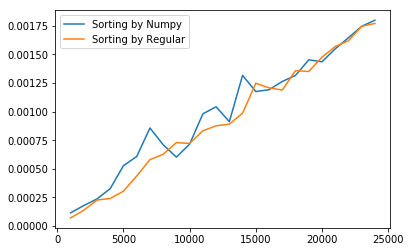

In [47]:
#Sort Plot
plt.plot(B_sort_np_size, time_sort_np, label="Sorting by Numpy") #Numpy
plt.plot(B_sort_reg_size, time_sort_reg, label = "Sorting by Regular") #Regular
plt.legend(loc = 'best')

### Sorting happens in same time because the alogirthm takes O(nlogn) to perform a sort. However, numpy takes more time to sort since it does its calculations in C language because of this extra conversions it takes a little more time than an inbuilt python sort

In [29]:
time_det_np = []
A_det_np_size = []

#Determinant of A NUMPY
#for n_a in range(100, 1500, 50):
for n_a in range(2, 10, 1):
    A = np.random.rand(n_a, n_a)
    start_time = time.time()
    Det_A = np.linalg.det(A)
    end_time = time.time()
    time_taken = end_time - start_time
    time_det_np.append(time_taken)
    A_det_np_size.append(n_a)
    

In [30]:
time_det_reg = []
A_det_reg_size = []

#Determinant REGULAR
def getMatrixDeternminant(matrix, mul):
    width = len(matrix)
    if width == 1:
        return mul * matrix[0][0]
    else:
        sign = -1
        sum = 0
        for i in range(width):
            m = []
            for j in range(1, width):
                buff = []
                for k in range(width):
                    if k != i:
                        buff.append(matrix[j][k])
                m.append(buff)
            sign *= -1
            sum += mul * getMatrixDeternminant(m, sign * matrix[0][i])
        return sum


for n_a in range(2, 10, 1):
#for n_a in range(100, 1500, 50):
    A = np.random.rand(n_a, n_a)
    start_time = time.time()
    Det_A = getMatrixDeternminant(A, 1)
    end_time = time.time()
    time_taken = end_time - start_time
    time_det_reg.append(time_taken)
    A_det_reg_size.append(n_a)
    

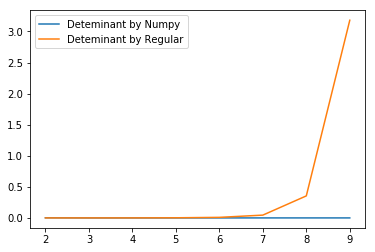

In [31]:
plt.plot(A_det_np_size, time_det_np, label = "Deteminant by Numpy") #Numpy
plt.plot(A_det_reg_size, time_det_reg, label = "Deteminant by Regular") #Regular
plt.legend(loc = 'best')

### For caluclation of determinants it can be clearly seen that since numpy uses C language to compute the determinant, it is faster than that of a user defined function in python 

In [32]:
time_mul_np = []
A_mul_np_size = []

#Matrix Multiplication NUMPY
#for n_a in range(100, 1500, 50):
for n_a in range(10, 100, 10):
    A = np.random.rand(n_a, n_a)
    start_time = time.time()
    MulA = np.matmul(A, A)
    end_time = time.time()
    time_taken = end_time - start_time
    time_mul_np.append(time_taken)
    A_mul_np_size.append(n_a)
    

In [33]:
time_mul_reg = []
A_mul_reg_size = []
def multiply(A, B):
    result = [[sum(a*b for a,b in zip(A_row, A_row)) for A_col in zip(*A)] for A_row in A]
    

#Matrix Multiplication Regular
#Matrix Multiplication NUMPY
#for n_a in range(100, 1500, 50):
for n_a in range(10, 100, 10):
    A = np.random.rand(n_a, n_a)
    start_time = time.time()
    MulA = multiply(A, A)
    end_time = time.time()
    time_taken = end_time - start_time
    time_mul_reg.append(time_taken)
    A_mul_reg_size.append(n_a)

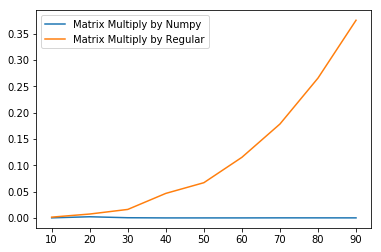

In [34]:
plt.plot(A_mul_np_size, time_mul_np, label = "Matrix Multiply by Numpy") #Numpy
plt.plot(A_mul_reg_size, time_mul_reg, label = "Matrix Multiply by Regular") #Regular
plt.legend(loc = 'best')

### For calculating the multiplication for big matrices again numpy uses C language which is faster than python and hence due to increase in the number of calculations, the matrix multiplication in python is showing an exponenetial increase